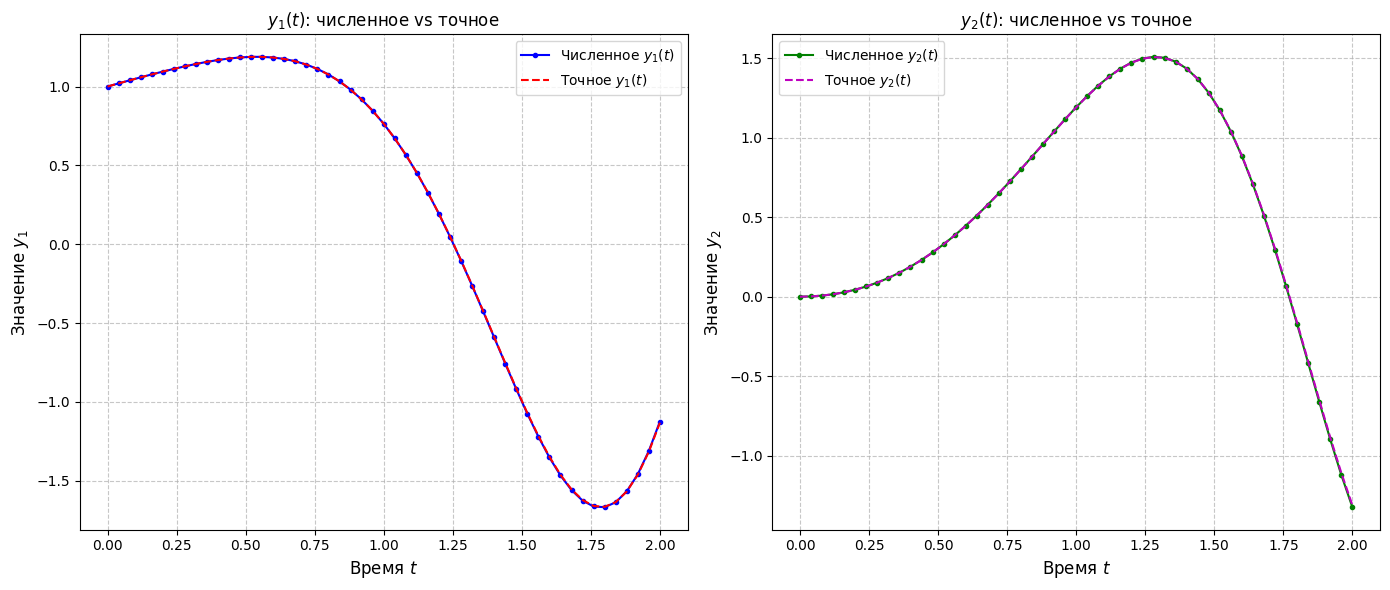

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


def test_f_system(t, y):
    y1, y2 = y
    denom = 2 + 2 * t
    dy1_dt = y1 / denom - 2 * t * y2
    dy2_dt = y2 / denom + 2 * t * y1
    return np.array([dy1_dt, dy2_dt])

def exact_y1(t):
    return np.cos(t**2)*np.sqrt(1+t)

def exact_y2(t):
    return np.sin(t**2)*np.sqrt(1+t)


# метод Рунге-Кутты второго порядка
def runge_kutta_2nd_order(f, a, b, y0, N):
    h = (b - a) / N
    t_values = np.array([a + h * i for i in range(N + 1)])
    y_values = np.zeros((N + 1, len(y0)))
    y_values[0] = y0
    for i in range(N):
        t = t_values[i]
        y = y_values[i]

        k1 = f(t, y)
        k2 = f(t + h, y + h * k1)

        y_new = y + h * (k1 + k2) / 2
        y_values[i + 1] = y_new
    return t_values, y_values

# тестовое решение
a = 0
b = 2
y0 = np.array([exact_y1(a), exact_y2(a)])  # Начальные условия из точного решения


# Выберем один из шагов для отображения (например, N = 50)
N_example = 50
t_example, y_example = runge_kutta_2nd_order(test_f_system, a, b, y0, N_example)

# Точные решения
y1_exact = exact_y1(t_example)
y2_exact = exact_y2(t_example)

# === Построение графиков точного и численного решений для тестовой задачи ===
plt.figure(figsize=(14, 6))

# График y1(t)
plt.subplot(1, 2, 1)
plt.plot(t_example, y_example[:, 0], 'b.-', label='Численное $y_1(t)$')
plt.plot(t_example, y1_exact, 'r--', label='Точное $y_1(t)$')
plt.xlabel('Время $t$', fontsize=12)
plt.ylabel('Значение $y_1$', fontsize=12)
plt.title(f'$y_1(t)$: численное vs точное', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# График y2(t)
plt.subplot(1, 2, 2)
plt.plot(t_example, y_example[:, 1], 'g.-', label='Численное $y_2(t)$')
plt.plot(t_example, exact_y2(t_example), 'm--', label='Точное $y_2(t)$')
plt.xlabel('Время $t$', fontsize=12)
plt.ylabel('Значение $y_2$', fontsize=12)
plt.title(f'$y_2(t)$: численное vs точное', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

   N     Шаг h    Макс. ошибка      e/h²     alpha
----  --------  --------------  --------  --------
  10  2.00e-01        3.77e-01  9.42e+00  2.14e+00
  20  1.00e-01        8.54e-02  8.54e+00  2.08e+00
  50  4.00e-02        1.27e-02  7.91e+00  2.03e+00
 100  2.00e-02        3.09e-03  7.72e+00  2.02e+00
 200  1.00e-02        7.63e-04  7.63e+00  2.01e+00
 500  4.00e-03        1.21e-04  7.57e+00  2.00e+00
1000  2.00e-03        3.02e-05  7.55e+00  2.00e+00
2000  1.00e-03        7.53e-06  7.53e+00


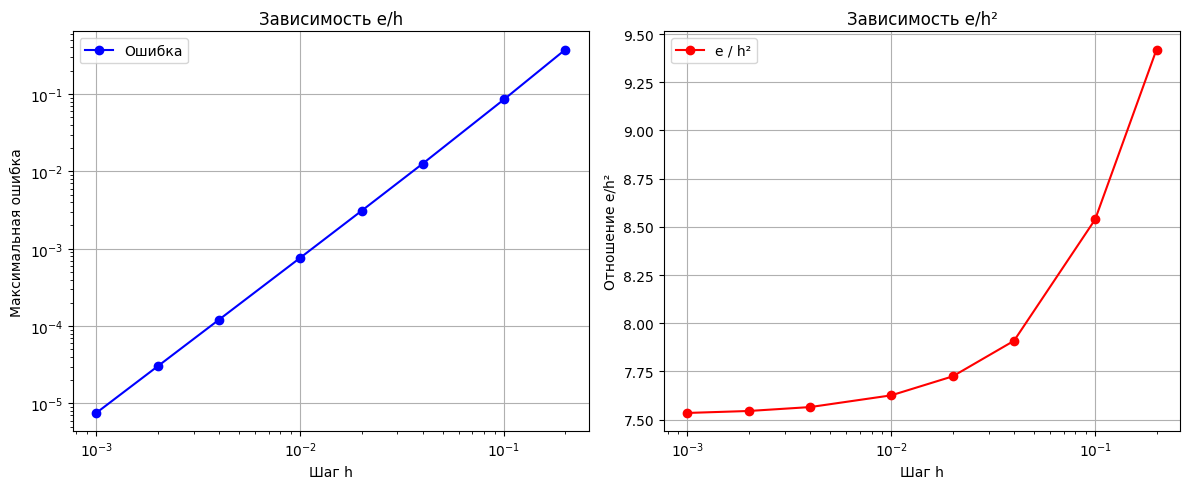

In [18]:

h_list = [0.2, 0.1, 0.04, 0.02, 0.01, 0.004, 0.002, 0.001]
# Вычисление ошибок и результатов
results = []
for h in h_list:
    N = int(b / h)
    t_values, y_values = runge_kutta_2nd_order(test_f_system, a, b, y0, N)
    exact_y1_values = exact_y1(t_values)
    exact_y2_values = exact_y2(t_values)
    error_y1 = np.max(np.abs(y_values[:, 0] - exact_y1_values))
    error_y2 = np.max(np.abs(y_values[:, 1] - exact_y2_values))
    max_error = max(error_y1, error_y2)
    ratio = max_error / h**2
    results.append([N, h, max_error, ratio])

alphas = []
for i in range(len(results) - 1):
    alpha = np.log(results[i+1][2] / results[i][2]) / np.log(results[i+1][1] / results[i][1])
    alphas.append(alpha)

for i in range(len(results) - 1):
    results[i].append(alphas[i])
results[-1].append(None)

# Вывод таблицы
headers = ["N", "Шаг h", "Макс. ошибка", "e/h²", "alpha"]
print(tabulate(results, headers=headers, floatfmt=".2e"))

# Создаем окно с двумя графиками
plt.figure(figsize=(12, 5))

# === График 1: Ошибка от шага ===
plt.subplot(1, 2, 1)
plt.plot(h_list, [r[2] for r in results], 'bo-', label='Ошибка')
plt.xlabel('Шаг h')
plt.ylabel('Максимальная ошибка')
plt.title('Зависимость e/h')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

# === График 2: Отношение ошибки к h² ===
plt.subplot(1, 2, 2)
plt.plot(h_list, [r[3] for r in results], 'ro-', label='e / h²')
plt.xlabel('Шаг h')
plt.ylabel('Отношение e/h²')
plt.title('Зависимость e/h²')
plt.legend()
plt.grid(True)
plt.xscale('log')

plt.tight_layout()
plt.show()

  Шаг h    Макс. высота z_max    Время достижения t_max
-------  --------------------  ------------------------
 4.0000              398.5447                  300.0000
 3.0000              175.9666                  201.0000
 2.0000              306.9513                  262.0000
 1.0000              264.5876                  243.0000
 0.8000              223.3930                  224.0000
 0.5000              244.7155                  233.5000
 0.1000              225.5310                  224.4000
 0.0500              225.5602                  224.3500
 0.0100              225.5696                  224.3300


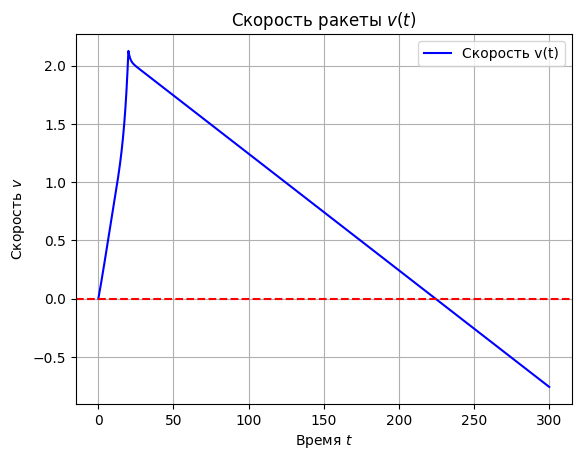

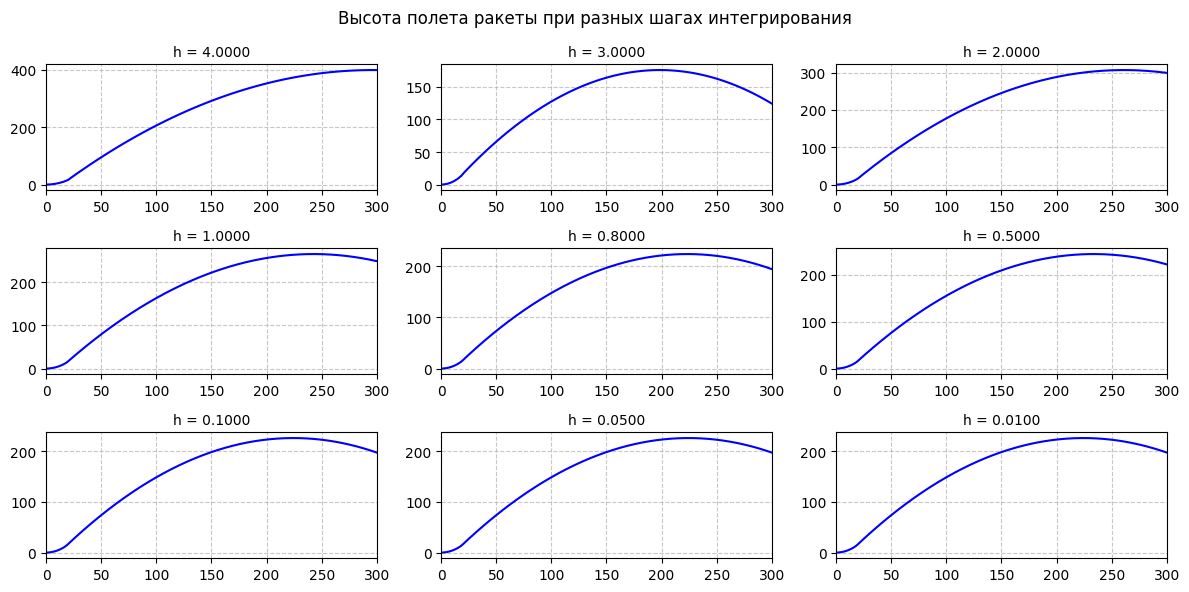

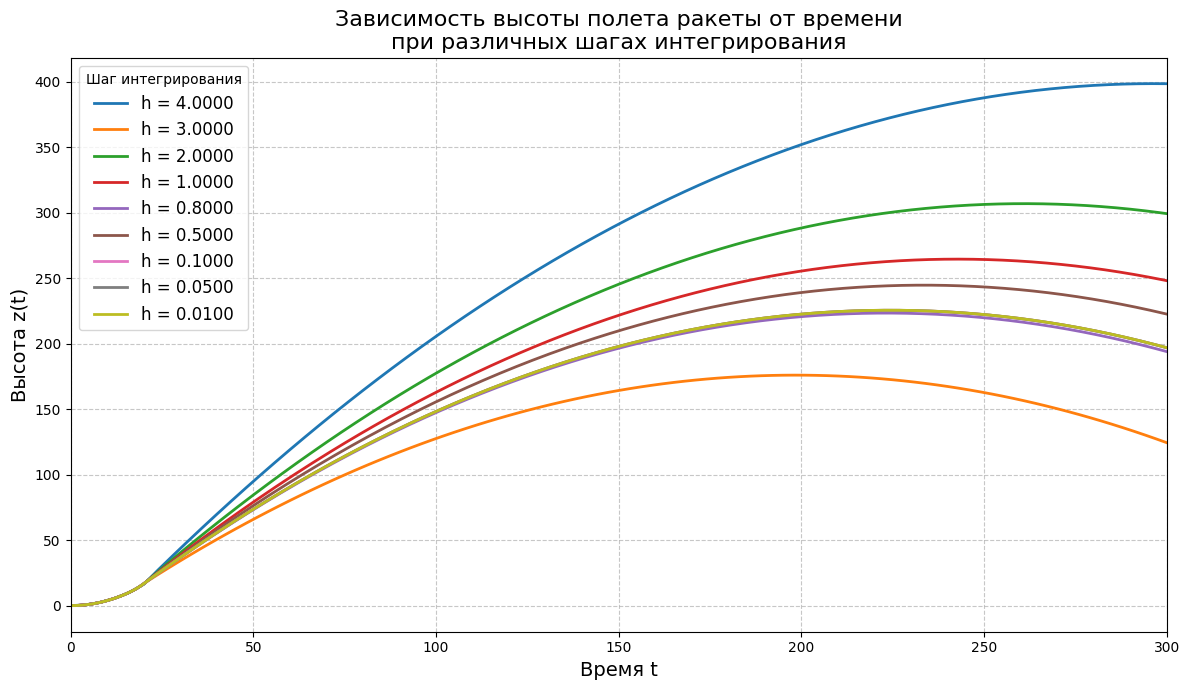

In [19]:
g = 0.01  # ускорение свободного падения
value = 2  # зависимость силы тяги от расхода топлива
C = 0.05  # коэффициент аэродинамического сопротивления
gamma = 0.01  # убывание плотности атмосферы с увеличением высоты
m_T = 0.8  # масса топлива
t_s = 20  # время полного выгорания топлива
T = 300 # конечное время


def q(t):
    if t <= t_s:
        return m_T / t_s
    else:
        return 0


# функция правой части системы уравнений
def f(t, y):
    m, z, v = y
    rho = np.exp(-gamma * z**2)
    dm_dt = -q(t)
    dz_dt = v
    dv_dt = -g + 1 / m * (value * q(t) - C * rho * v ** 2)
    return np.array([dm_dt, dz_dt, dv_dt])


y0 = np.array([1.0, 0.0, 0.0])

h_list = [4, 3, 2, 1, 0.8, 0.5, 0.1, 0.05, 0.01]

results = []
trajectories = []

for h in h_list:
    N = int(T / h)
    t_values, y_values = runge_kutta_2nd_order(f, 0, T, y0, N)
    v_values = y_values[:, 2]
    # определение момента начала падения
    fall_index = None
    for i in range(1, len(v_values)):
        if v_values[i] < 0:
            fall_index = i
            break

    if fall_index is not None:
        max_z_idx = fall_index
    else:
        max_z_idx = np.argmax(y_values[:, 1])
    max_z = y_values[max_z_idx, 1]
    t_max_z = t_values[max_z_idx]

    results.append([h, max_z, t_max_z])
    trajectories.append((t_values, y_values[:, 1]))  # Сохраняем траектории для графиков

headers = ["Шаг h", "Макс. высота z_max", "Время достижения t_max"]
print(tabulate(results, headers=headers, floatfmt=".4f"))

# Построение графика скорости
plt.figure()
v_values = y_values[:, 2]
plt.plot(t_values, v_values, 'b-', label='Скорость v(t)')
plt.axhline(0, color='r', linestyle='--')
plt.title("Скорость ракеты $ v(t) $")
plt.xlabel("Время $ t $")
plt.ylabel("Скорость $ v $")
plt.grid(True)
plt.legend()
plt.show()

# Построение отдельных графиков для каждого шага h
fig, axes = plt.subplots((len(trajectories) + 1) // 3, 3, figsize=(12, 6))

for ax, (t_vals, z_vals), h in zip(axes.flat, trajectories, h_list):
    ax.plot(t_vals, z_vals, 'b-', label=f'h = {h:.4f}')
    ax.set_title(f'h = {h:.4f}', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlim(0, T)

plt.suptitle('Высота полета ракеты при разных шагах интегрирования')
plt.tight_layout()
plt.show()


# Построение графиков
plt.figure(figsize=(12, 7))

for i, (t_vals, z_vals) in enumerate(trajectories):
    plt.plot(t_vals, z_vals, label=f'h = {h_list[i]:.4f}', linewidth=2)

plt.xlabel('Время t', fontsize=14)
plt.ylabel('Высота z(t)', fontsize=14)
plt.title('Зависимость высоты полета ракеты от времени\nпри различных шагах интегрирования', fontsize=16)
plt.legend(fontsize=12, title="Шаг интегрирования")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, T)
plt.tight_layout()
plt.show()

    t_s    Макс. высота z_max
-------  --------------------
 3.0000               27.3075
 6.0000               49.0434
 9.0000               82.1055
12.0000              122.9716
15.0000              165.4795
18.0000              203.6655
21.0000              235.2586
24.0000              259.4416
27.0000              277.2075
30.0000              289.9745

Оптимальное время работы двигателя: t_s = 30.00


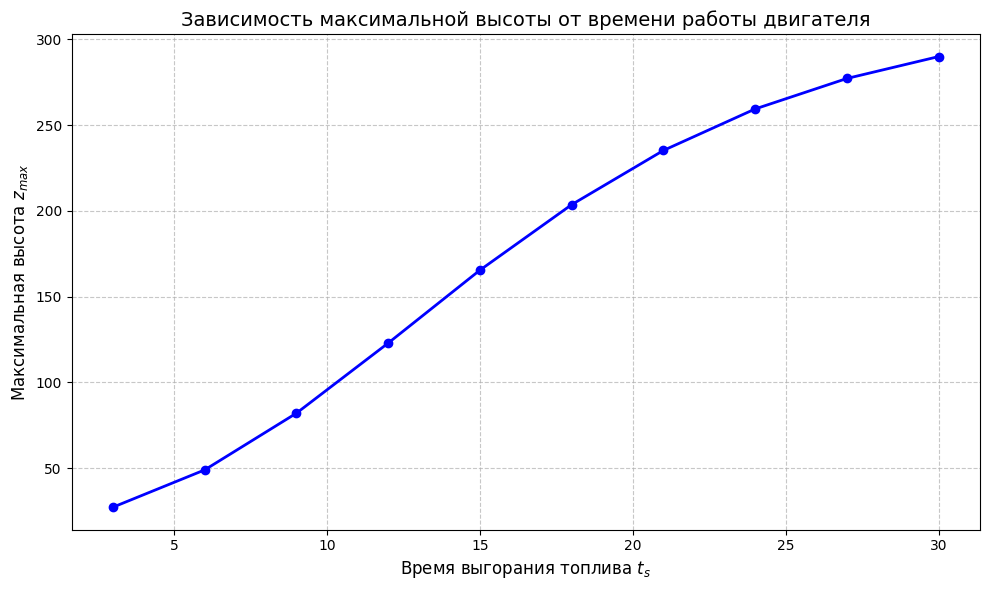

In [20]:
h = 0.01 # фиксированный шаг для точности

def get_max_height(t_s):
    y0 = np.array([1.0, 0.0, 0.0])
    N = int(T/h)
    t_values, y_values = runge_kutta_2nd_order(f, 0, T, y0, N)

    fall_index = None
    v_values = y_values[:, 2]
    for i in range(1, len(v_values)):
        if v_values[i] < 0:
            fall_index = i
            break
    if fall_index is not None:
        max_z_idx = fall_index
    else:
        max_z_idx = np.argmax(y_values[:,1])
    max_z = y_values[max_z_idx, 1]
    return max_z

t_s_list = np.arange(3, 31, 3)
heights = []

for t_s in t_s_list:
    max_z = get_max_height(t_s)
    heights.append([t_s, max_z])

headers = ["t_s", "Макс. высота z_max"]
print(tabulate(heights, headers=headers, floatfmt=".4f"))

heights = np.array(heights)
optimal_t_s = heights[np.argmax(heights[:,1]), 0]

print(f"\nОптимальное время работы двигателя: t_s = {optimal_t_s:.2f}")

# === График зависимости высоты от t_s ===
plt.figure(figsize=(10, 6))
plt.plot(heights[:, 0], heights[:, 1], 'bo-', linewidth=2)
plt.xlabel("Время выгорания топлива $ t_s $", fontsize=12)
plt.ylabel("Максимальная высота $ z_{max} $", fontsize=12)
plt.title("Зависимость максимальной высоты от времени работы двигателя", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()